# Cavity Lid-Driven Flow


## (mini-project done by Soroush Eshaghi)

## Project Description

The lid-driven cavity consists of a square cavity filled with fluid. At the top
boundary, a tangential velocity is applied to drive the fluid flow in the cavity. The
remaining three walls are defined as no-slip conditions; that is, the velocity is 0.
This CFD problem is going to be solved by applying the Navier–Stokes equations in
two dimensions. At the end, the magnitude of the velocity and the direction of
the flow in the cavity will be plotted.

## Governing Equations

In order to calculate the velocity components **u** and **v**, Navier Stockes equations, resulting from momentum conservation equation, are utilized:

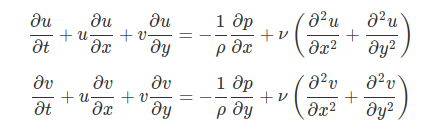

Moreover, Poisson Equation is used to acheive the pressure field (**p**). This equation is obtained by the divergence of the momentum equation and the use of continuity equation [1].

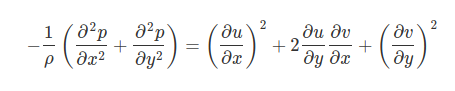

## Discretized Equations

By following an explicit finite difference scheme, the discretized form of  Navier Stokes equations is as follows: 


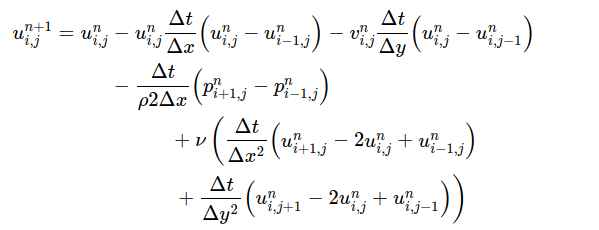

In a similar way, Poisson equation for pressure will be discretized:
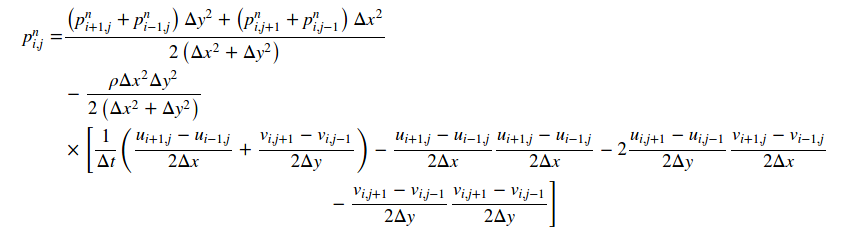

## Cavity Flow Simulation

### Problem Solving Procedure

After intoducing input and initial values, two buit-in functions including *plot* function and *pressure_equ* function will be defined. These will be called inside the main function called cavity which basically involves N.S. equations as well as boundary conditions. Finally, by calling the main function, the problem will be simulated for specified input data, and then velocity and pressure fields will be plotted for certain times.

### Inputs and Initial Values

numpy and matplotlib libraries, which are used in this problem, are imported at start. The size of cavity square is regarded as **1m X 1m**. The upper wall is moving with the velocity of 1m/s. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_len = 1 # the length of square in m
y_len = 1 # the width of square in m
x_n = 26  # Number of X divisions
y_n = 26  # Number of Y divisions
t = 20    # total time for which the problem is solved 
time_duration = [0.2, 2, 20] # times for which results will be plotted
 
dx = x_len / (x_n - 1)
dy = y_len / (y_n - 1)
dt = 0.001

x = np.linspace(0, x_len, x_n)
y = np.linspace(0, y_len, y_n)

# initial Conditions
u = np.zeros((y_n, x_n))  # u in time n+1
v = np.zeros((y_n, x_n))
p = np.zeros((y_n, x_n))
un = np.zeros_like(u)  # u in time n
pn = np.zeros_like(p)
vn = np.zeros_like(v)
rho = 1000
nu = 0.01

### Defining plot built-in function

In [2]:
def plot(m):

    # Creating Plots
    X, Y = np.meshgrid(x, y)

    # 1.Quiver Plot for Velocity Field
    fig, ax = plt.subplots(figsize=(5, 4), dpi=200)
    ax.quiver(X, Y, u, v, color="C0", alpha=0.9, scale=3)
    ax.set_title(f"Velocity Field(m/s) (after {m} seconds)")
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Y (m)")
    plt.show()
    # 2.Contour Plot for Pressure Field
    fig, ax = plt.subplots(figsize=(5, 4), dpi=200)
    plt.contourf(X, Y, p, alpha=0.7, cmap=plt.cm.plasma)
    plt.colorbar()
    plt.contour(X, Y, p, cmap=plt.cm.plasma)
    ax.set_title(f"Pressure Field (Pa) (after {m} seconds)")
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Y (m)")
    plt.show()

    return

### Defining pressure_equ built-in function

In [3]:
def pressure_equ(p, dx, dy):

    pn = p.copy()
    p[1:-1, 1:-1] = (
        (pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2
        + (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2
    ) / (2 * (dx**2 + dy**2)) - dx**2 * dy**2 / (
        2 * (dx**2 + dy**2)
    ) * rho * (
        1
        / dt
        * (
            (u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx)
            + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)
        )
        - ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx)) ** 2
        - 2
        * (
            (u[2:, 1:-1] - u[0:-2, 1:-1])
            / (2 * dy)
            * (v[1:-1, 2:] - v[1:-1, 0:-2])
            / (2 * dx)
        )
        - ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) ** 2
    )

    # Applying Boundary Conditions
    p[:, -1] = p[:, -2]  # dp/dy = 0 at x = 1
    p[0, :] = p[1, :]  # dp/dy = 0 at y = 0
    p[:, 0] = p[:, 1]  # dp/dx = 0 at x = 0
    p[-1, :] = 0  # p = 0 at y = 1

    return p

### Defining cavity function

In [4]:
def cavity(t, u, v, dt, dx, dy, p, rho, nu):
    m = 0
    while m < t:
        m = round(m + dt, 3)
        un = u.copy()
        vn = v.copy()
        p = pressure_equ(p, dx, dy)

        u[1:-1, 1:-1] = (
            un[1:-1, 1:-1]
            - un[1:-1, 1:-1] * dt / dx * (un[1:-1, 1:-1] - un[1:-1, 0:-2])
            - vn[1:-1, 1:-1] * dt / dy * (un[1:-1, 1:-1] - un[0:-2, 1:-1])
            - dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2])
            + nu
            * (
                dt
                / dx**2
                * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2])
                + dt
                / dy**2
                * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])
            )
        )

        v[1:-1, 1:-1] = (
            vn[1:-1, 1:-1]
            - un[1:-1, 1:-1] * dt / dx * (vn[1:-1, 1:-1] - vn[1:-1, 0:-2])
            - vn[1:-1, 1:-1] * dt / dy * (vn[1:-1, 1:-1] - vn[0:-2, 1:-1])
            - dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1])
            + nu
            * (
                dt
                / dx**2
                * (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2])
                + dt
                / dy**2
                * (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])
            )
        )

        # Applying Boundary Conditions for velocities
        u[0, :] = 0   #  velocity on cavity walls
        u[:, 0] = 0
        u[:, -1] = 0
        u[-1, :] = 1  #  velocity on cavity lid equal to 1 m/s
        v[0, :] = 0
        v[-1, :] = 0
        v[:, 0] = 0
        v[:, -1] = 0

        if m in time_duration: 
            plot(m)      # calling plot function

    return u, v, p

### Running the code and showing plots 

By calling cavity function, the problem is solved as per given data .For 3 different times until reaching the stady state, results will be plotted.

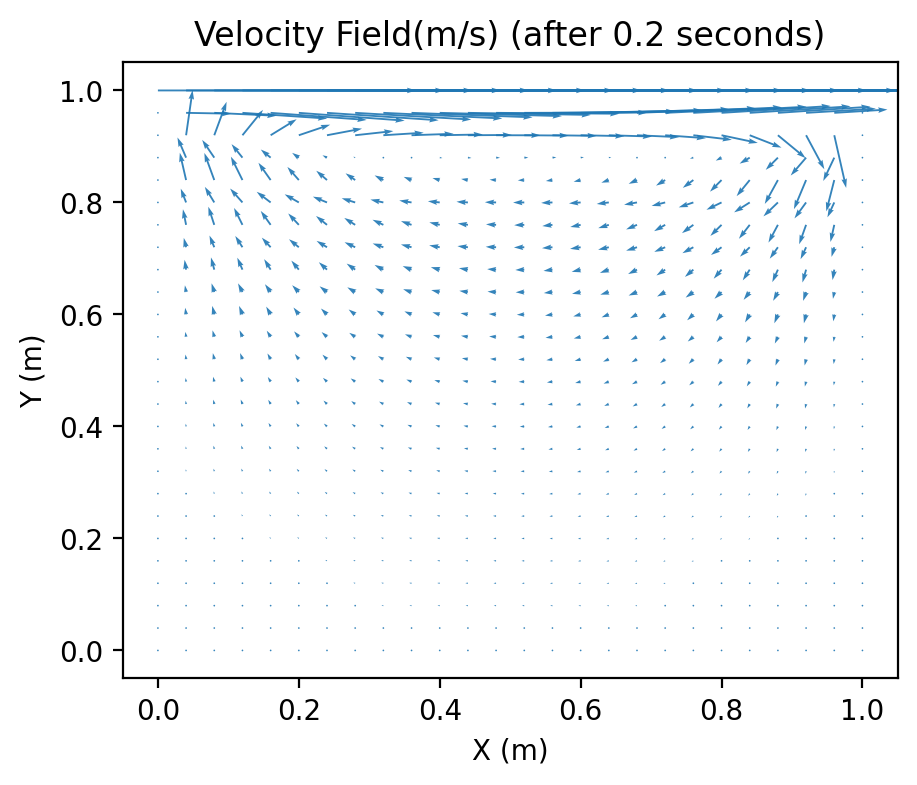

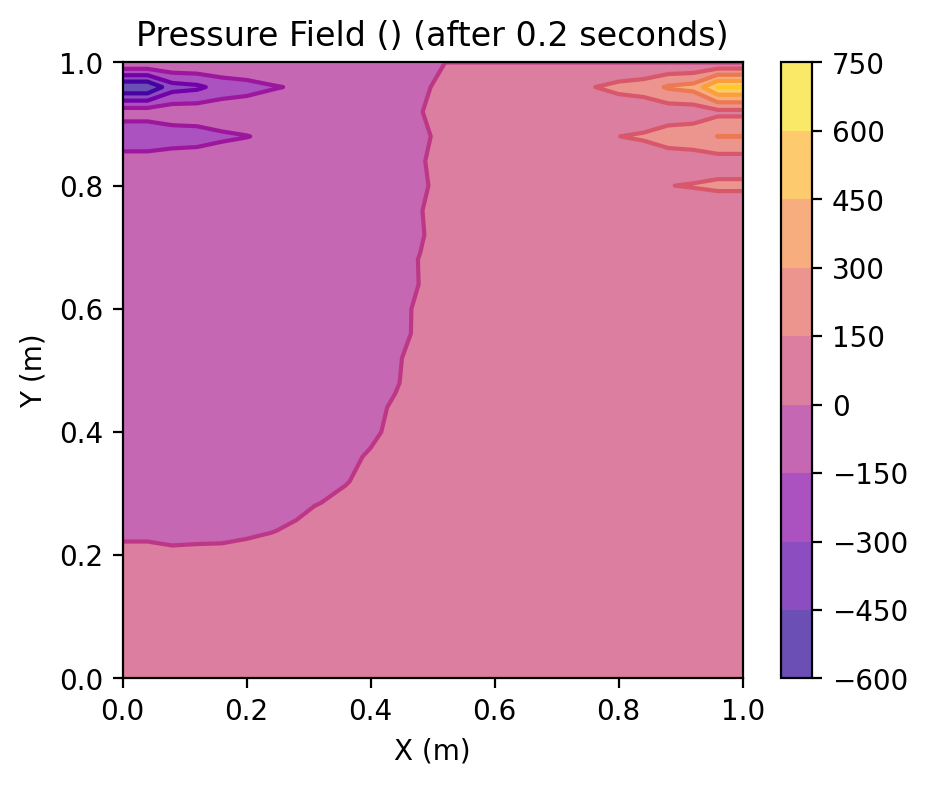

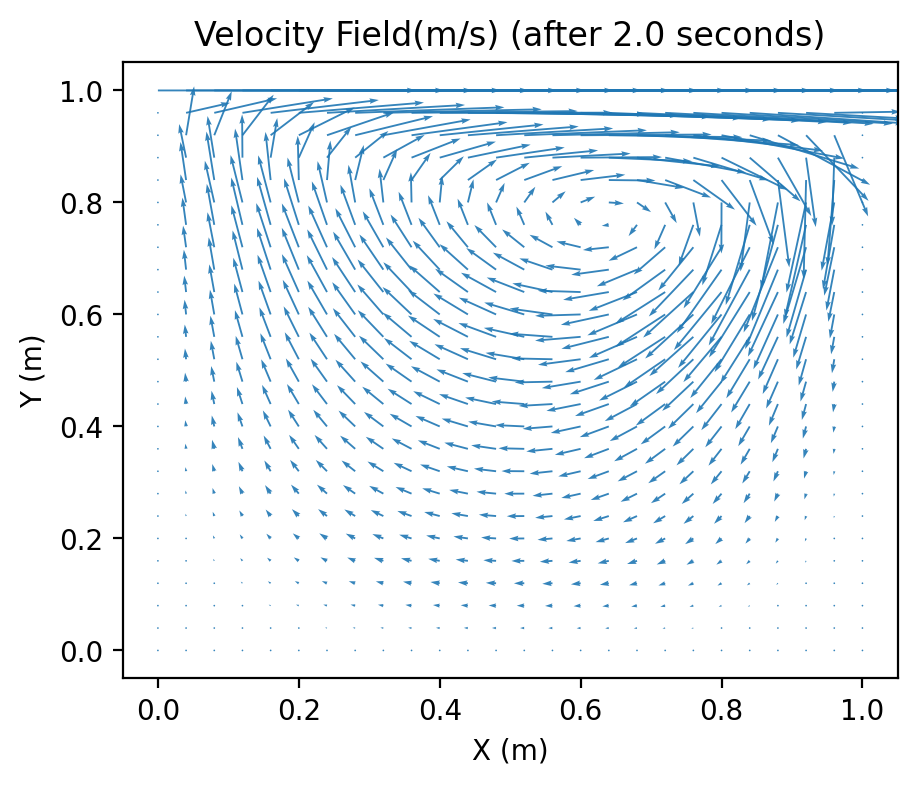

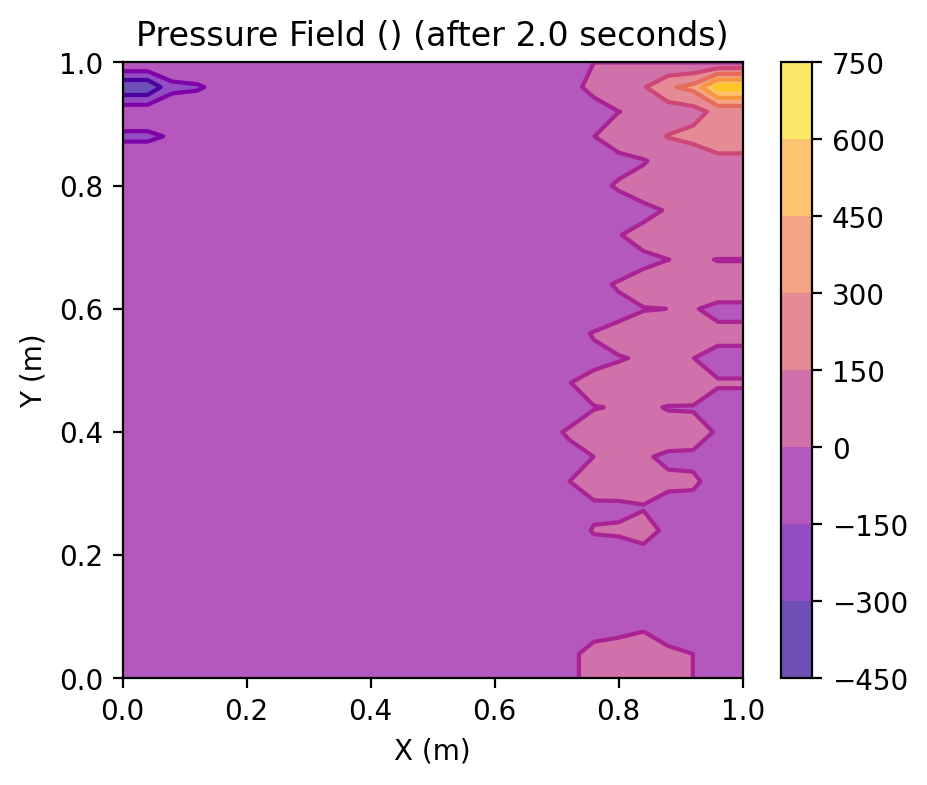

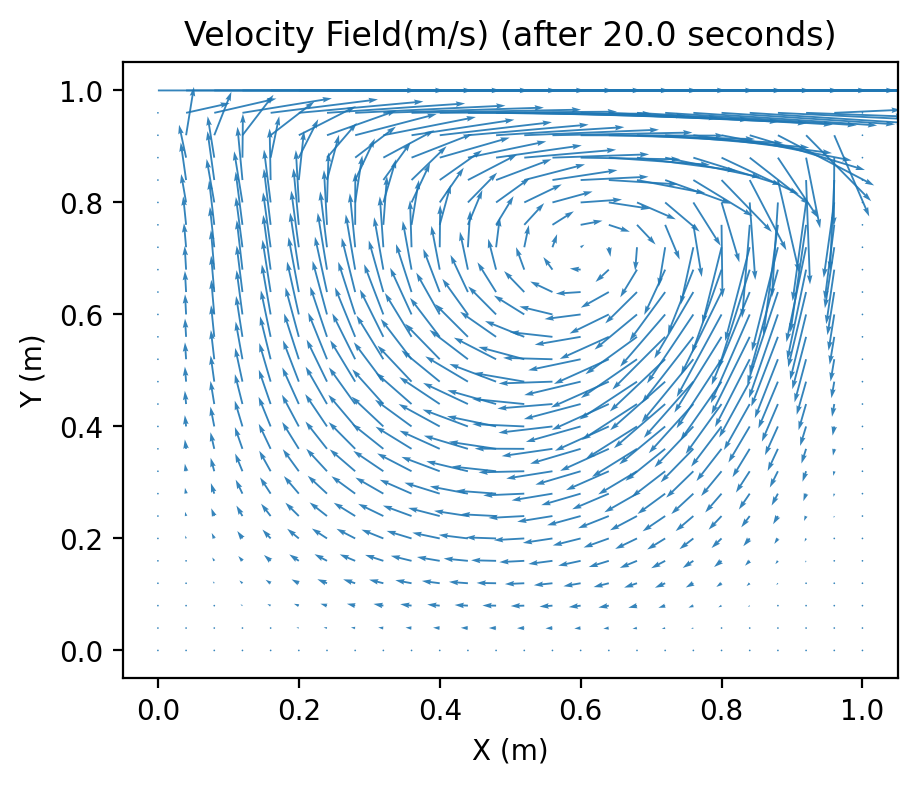

In [5]:

u, v, p = cavity(t, u, v, dt, dx, dy, p, rho, nu)

## References

[1] Cornthwaite, John, "Pressure Poisson Method for the Incompressible Navier-Stokes
Equations Using Galerkin Finite Elements" (2013). Electronic Theses and Dissertations.
831. 

[2] F. H. Harlow and J. E. Welch. Numerical calculation of time-dependent viscous incompressible flow of fluid
with free surface. Physics of fluids, 8(12):2182, 1965. 1